# TITANIC SURVIVAL ANALYSIS

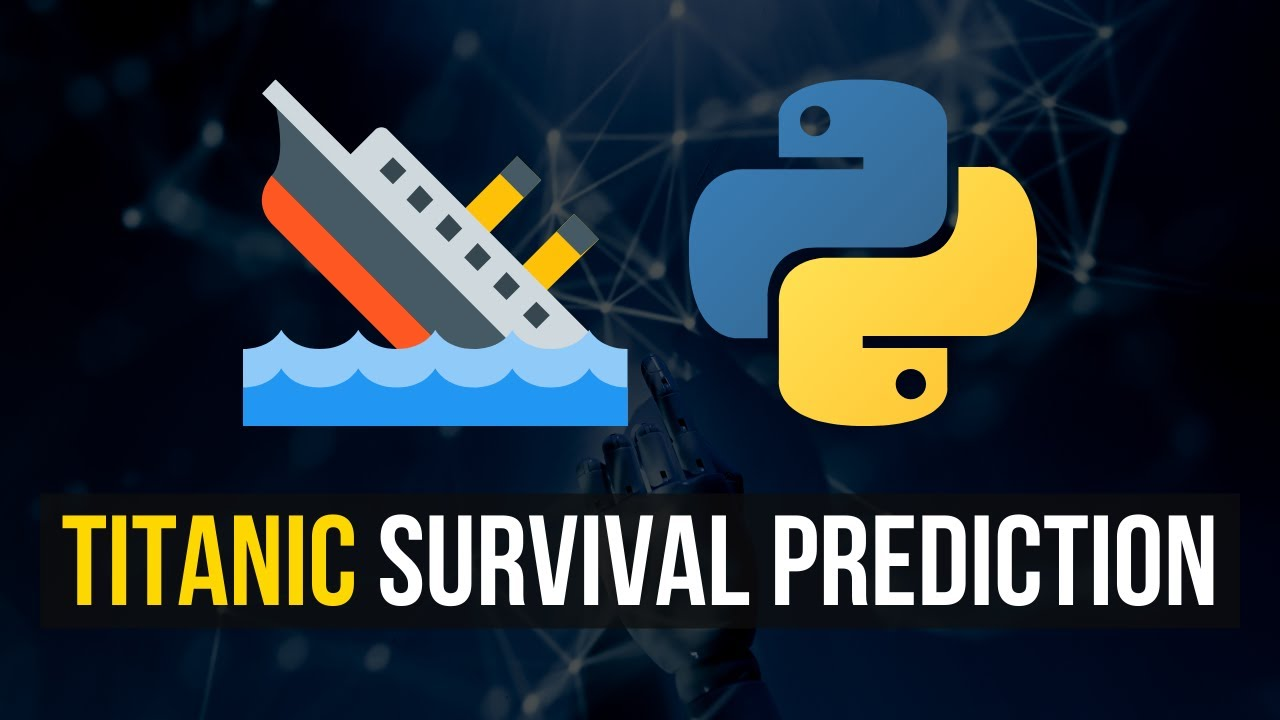

In [2]:
from IPython.display import Image
Image("titanic.jpg")

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('titanic_train.csv')

In [6]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [8]:
df.shape

(891, 12)

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df = df.drop(['PassengerId','Ticket','Name'], axis = 1)

In [11]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3    male  22.0      1      0   7.2500   NaN        S
1           1       1  female  38.0      1      0  71.2833   C85        C
2           1       3  female  26.0      0      0   7.9250   NaN        S
3           1       1  female  35.0      1      0  53.1000  C123        S
4           0       3    male  35.0      0      0   8.0500   NaN        S
..        ...     ...     ...   ...    ...    ...      ...   ...      ...
886         0       2    male  27.0      0      0  13.0000   NaN        S
887         1       1  female  19.0      0      0  30.0000   B42        S
888         0       3  female   NaN      1      2  23.4500   NaN        S
889         1       1    male  26.0      0      0  30.0000  C148        C
890         0       3    male  32.0      0      0   7.7500   NaN        Q

[891 rows x 9 columns]

In [12]:
df.duplicated().sum()

107

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df = df.drop(['Cabin'],axis=1)

In [15]:
df.duplicated().sum()

111

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [19]:
df.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [20]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [21]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [23]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Sex', 'Embarked'], dtype='object')

Numerical type columns:
Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [24]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [25]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [26]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Sex', 'Embarked']
Non-Categorical Features: []
Discrete Features: ['Survived', 'Pclass', 'SibSp', 'Parch']
Continuous Features: ['Age', 'Fare']


In [27]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Survived
[0 1]

Pclass
[3 1 2]

SibSp
[1 0 3 4 2 5 8]

Parch
[0 1 2 5 3 4 6]



In [28]:
for i in discrete:
    print(df[i].value_counts())
    print()

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64



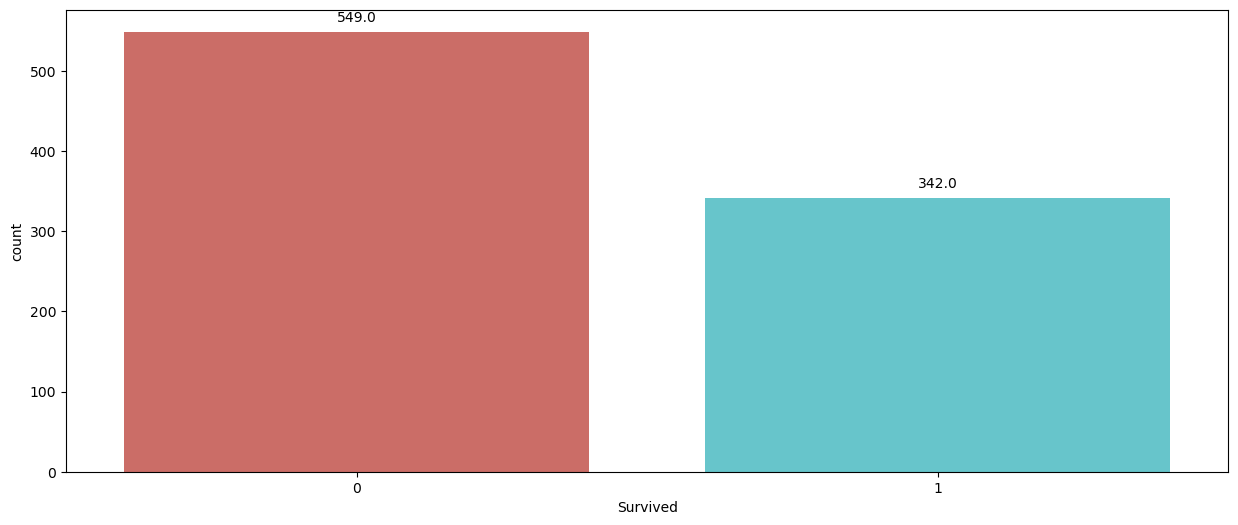

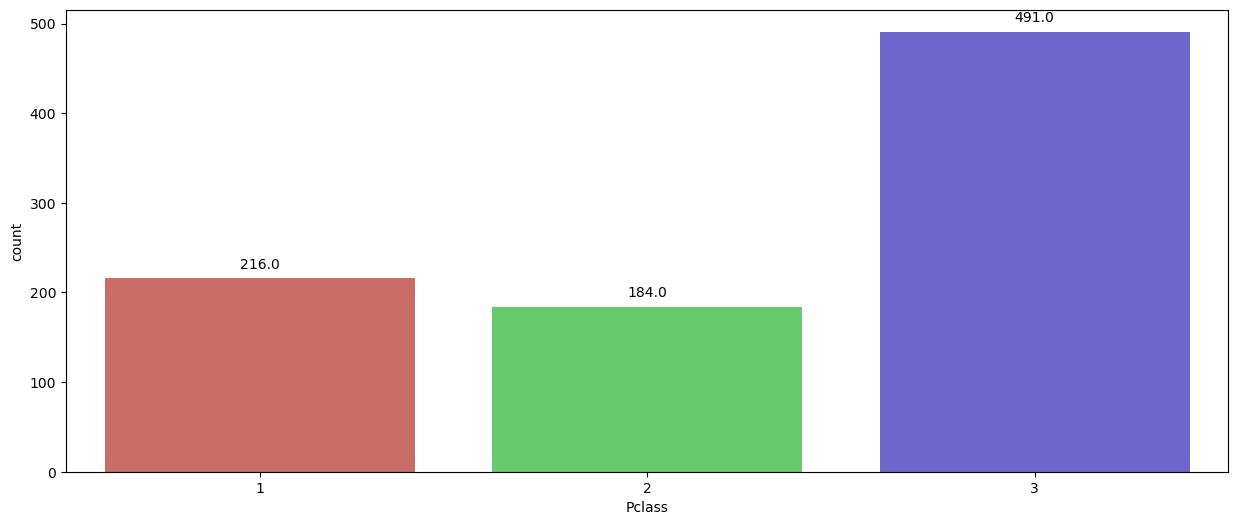

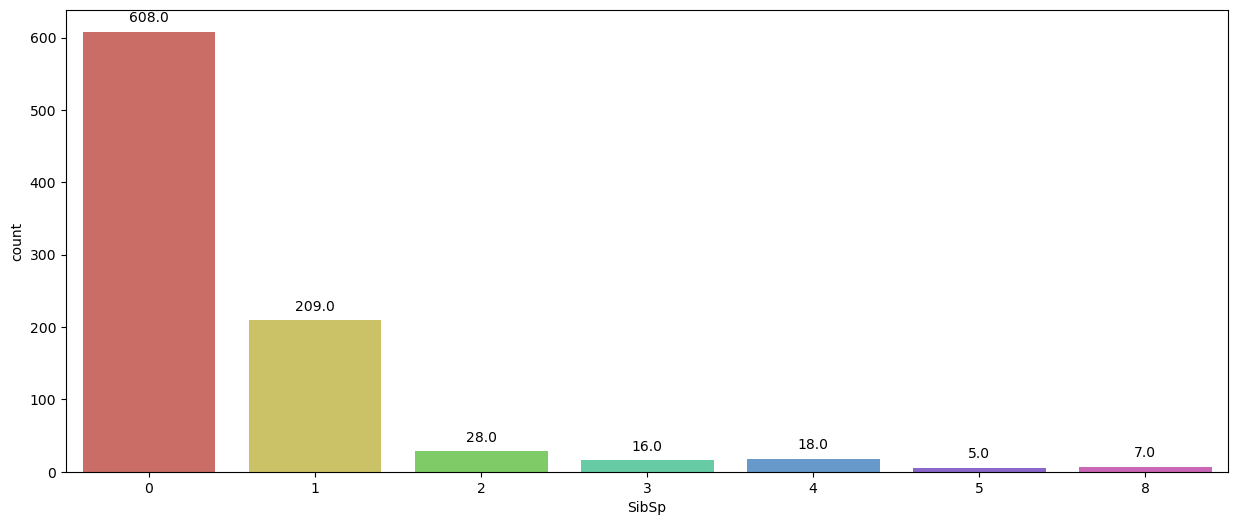

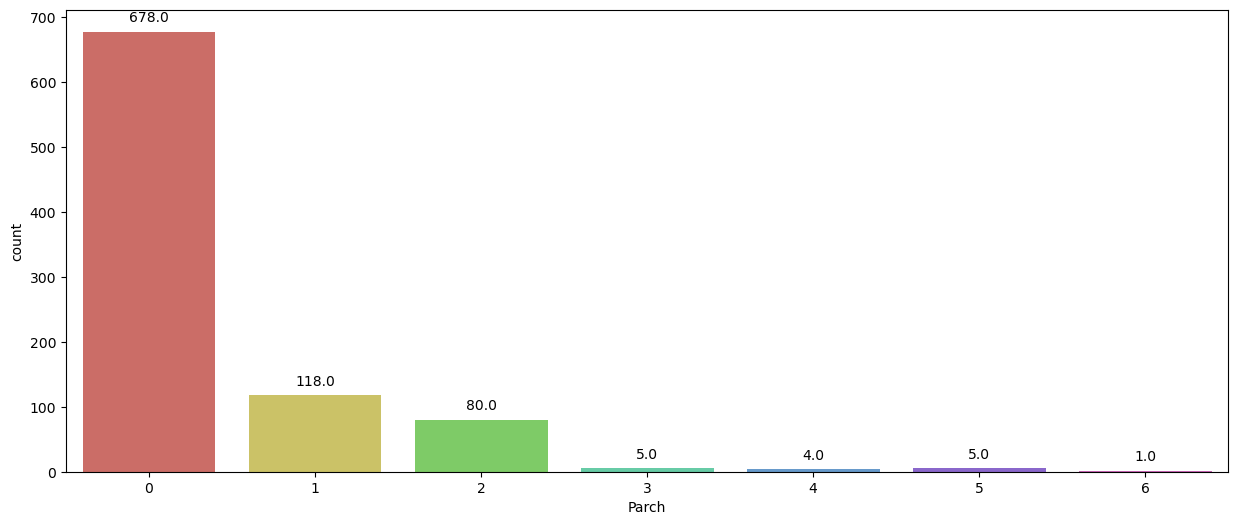

In [29]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [30]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [31]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Sex
['male' 'female']

Embarked
['S' 'C' 'Q']



In [32]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Sex
male      577
female    314
Name: Sex, dtype: int64

Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64



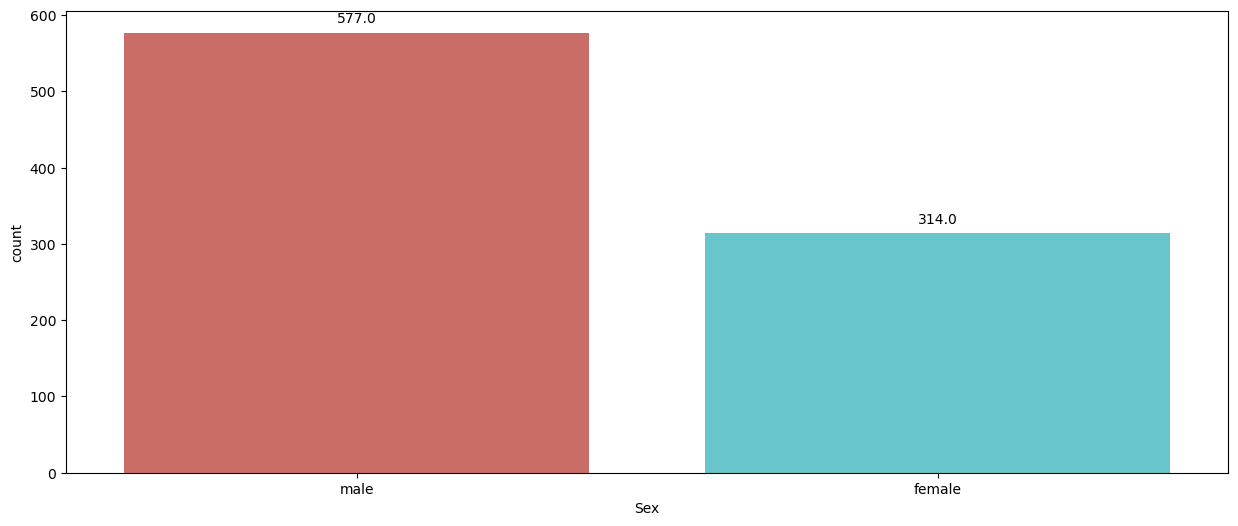

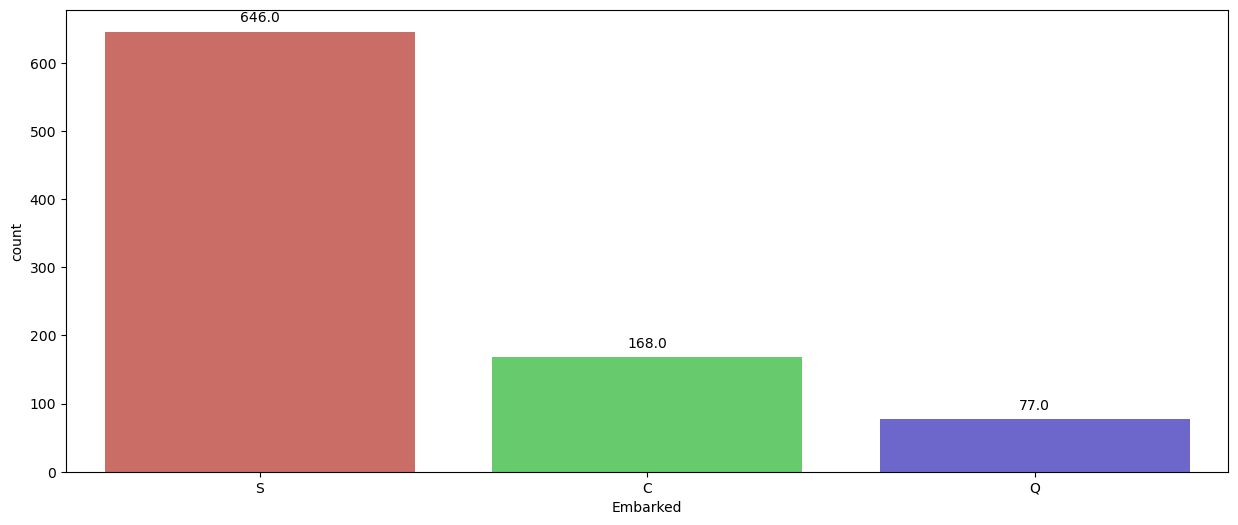

In [33]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [34]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

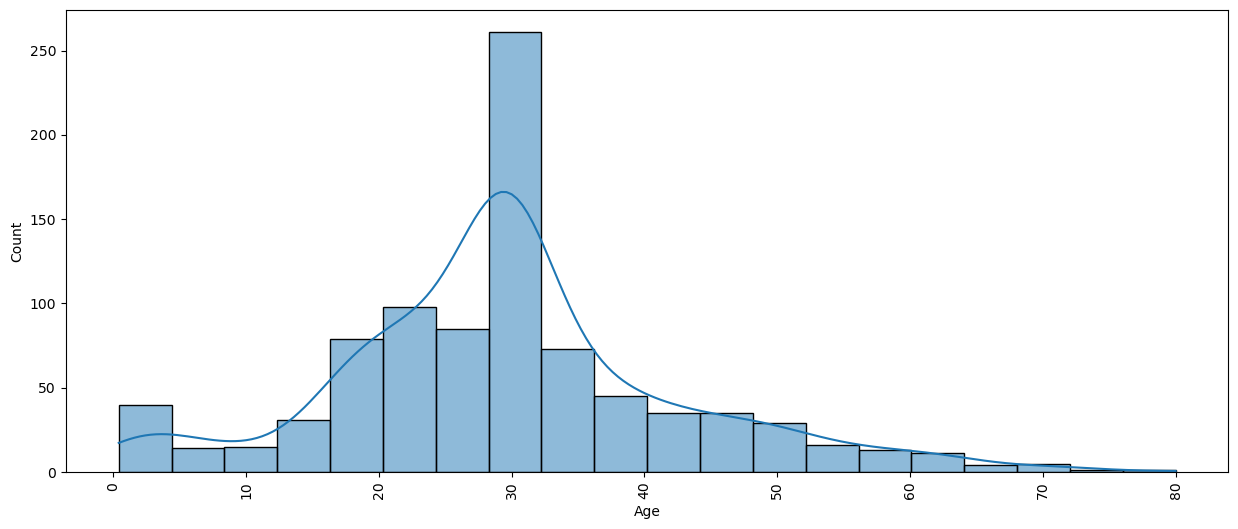

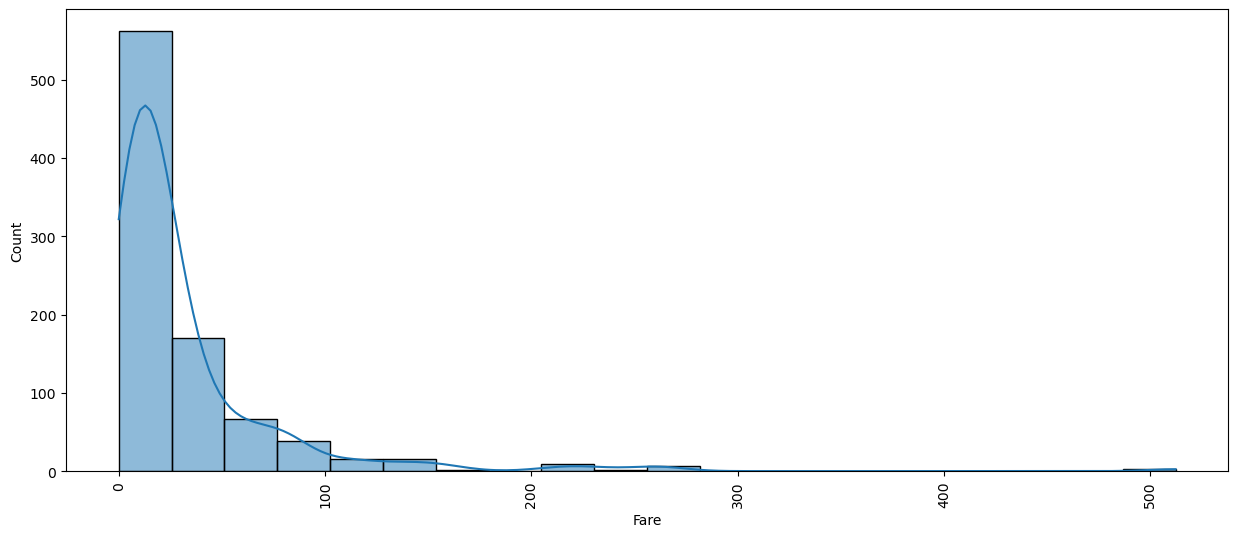

In [35]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

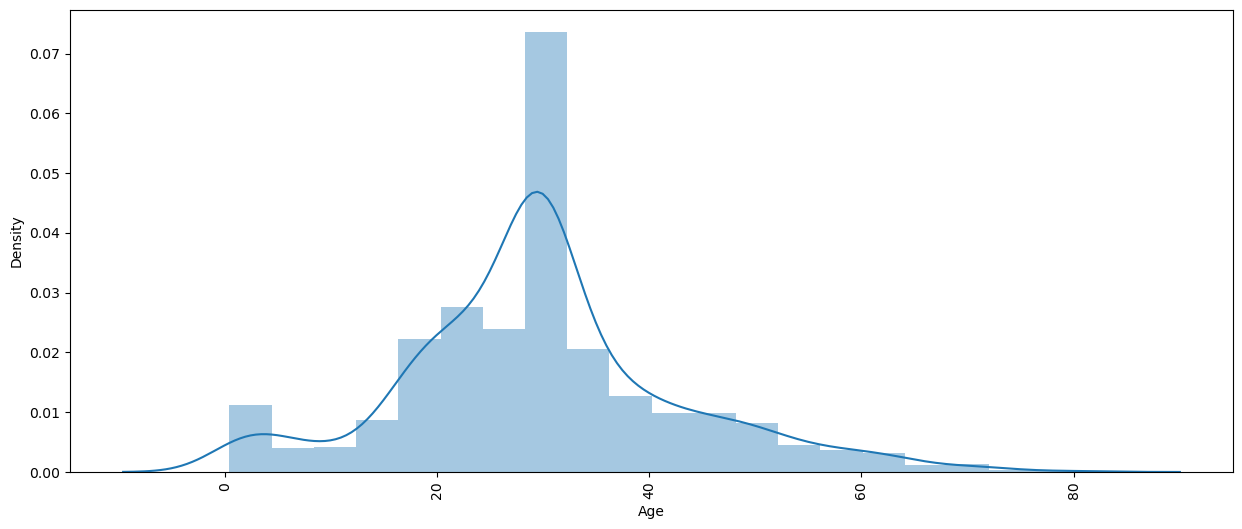

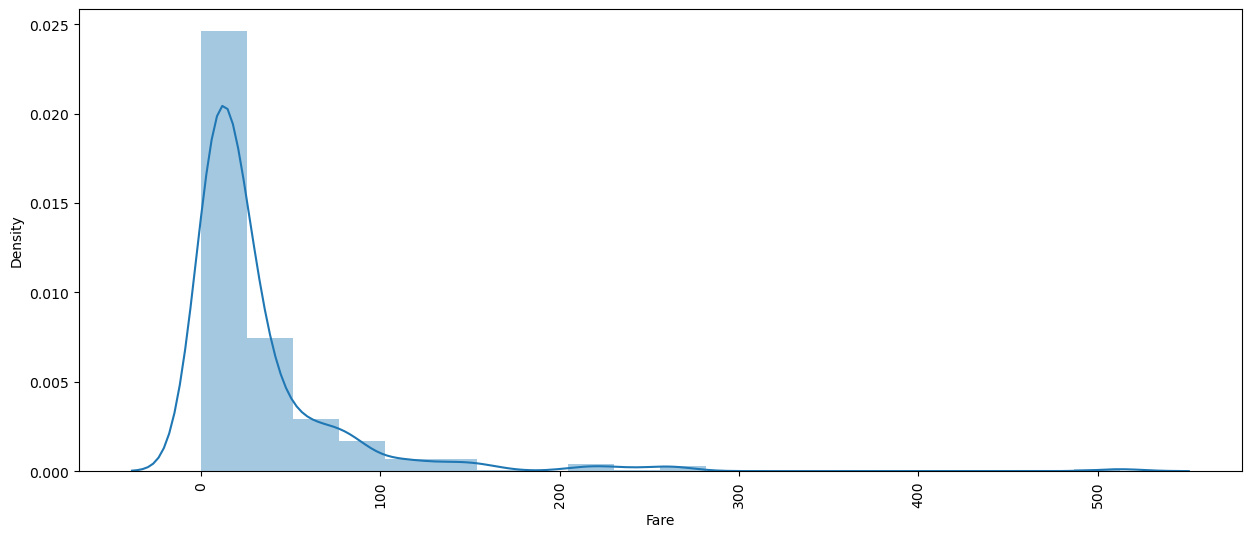

In [36]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

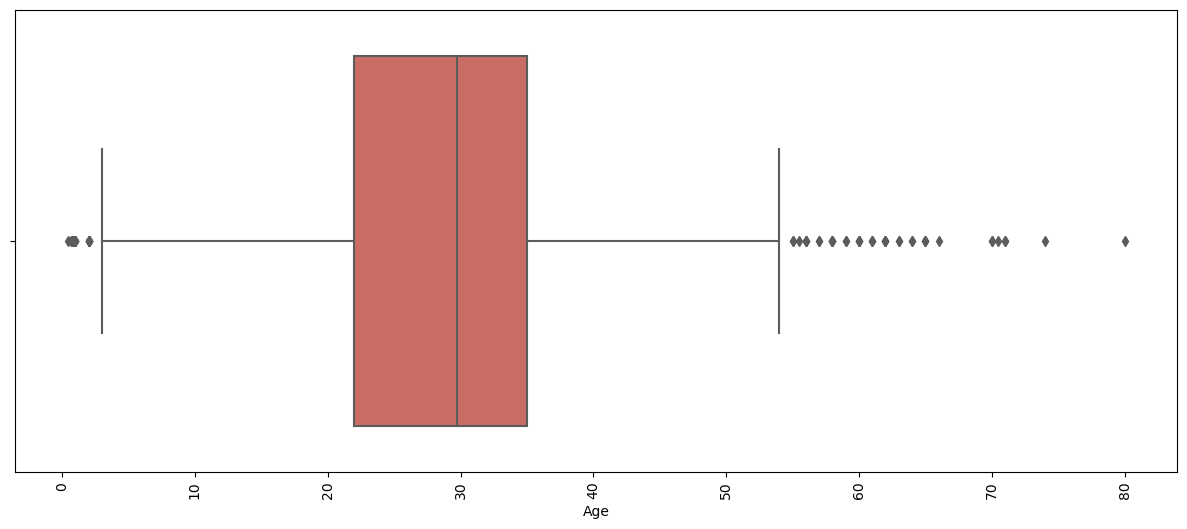

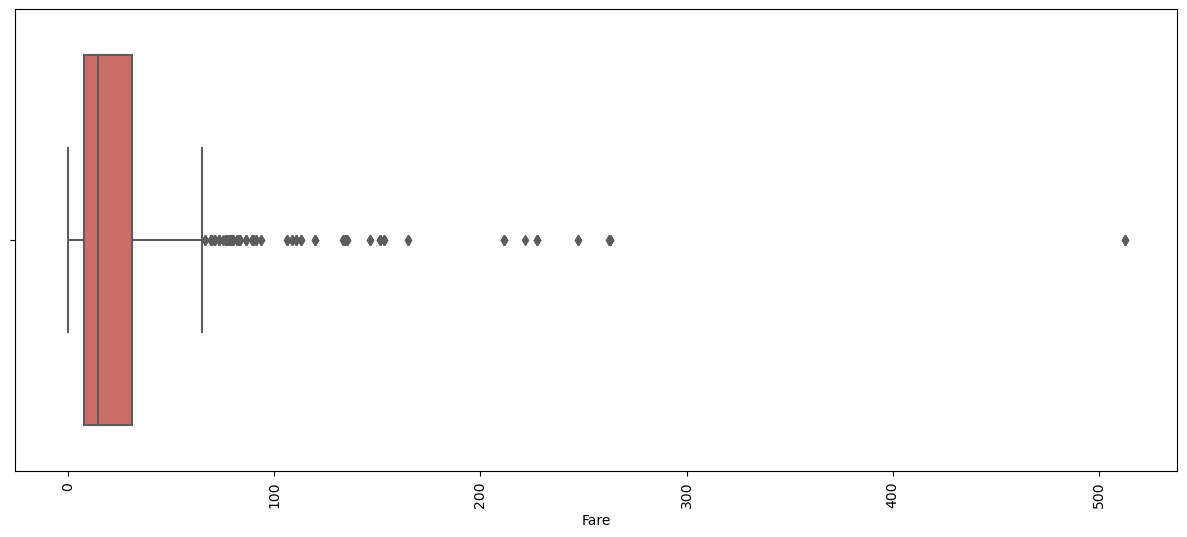

In [37]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

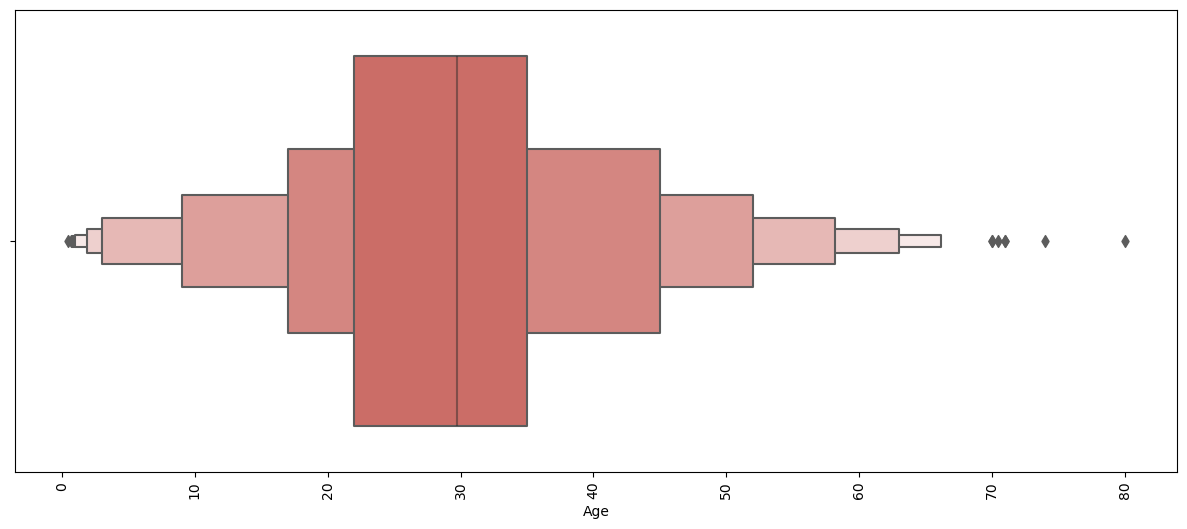

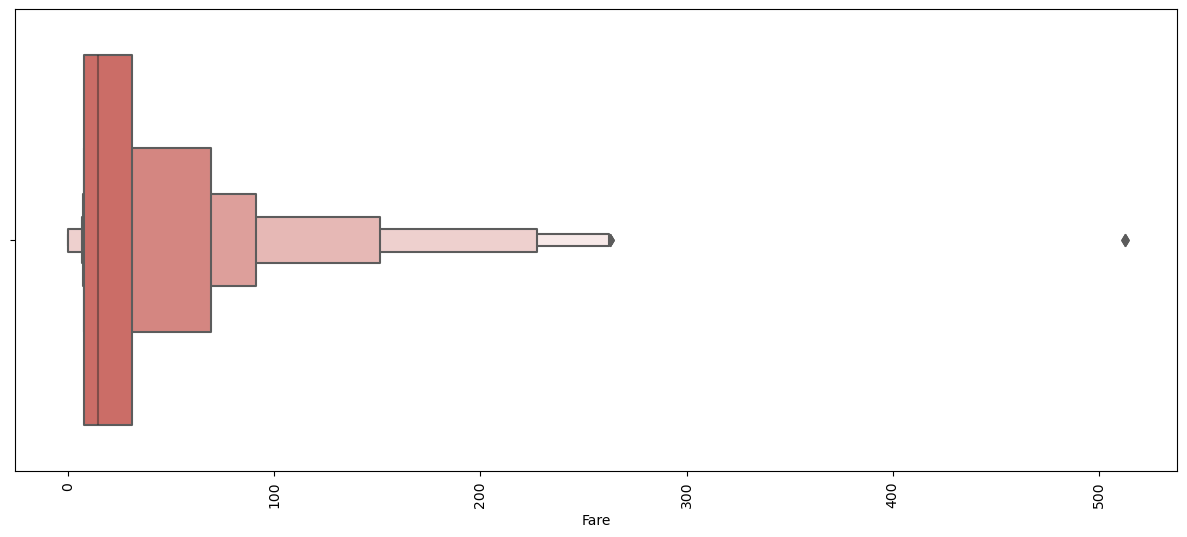

In [38]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

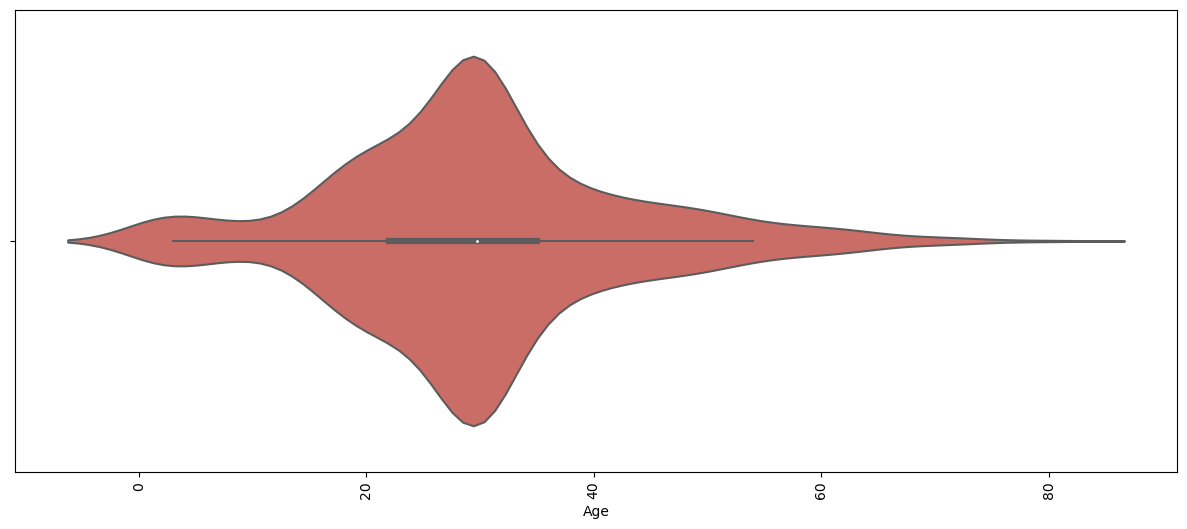

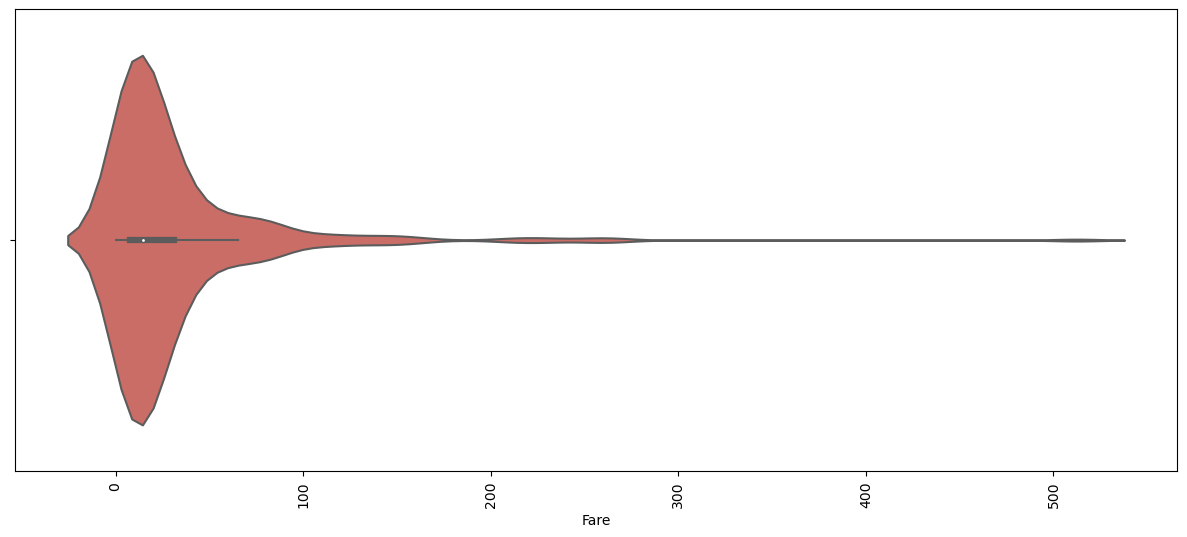

In [39]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

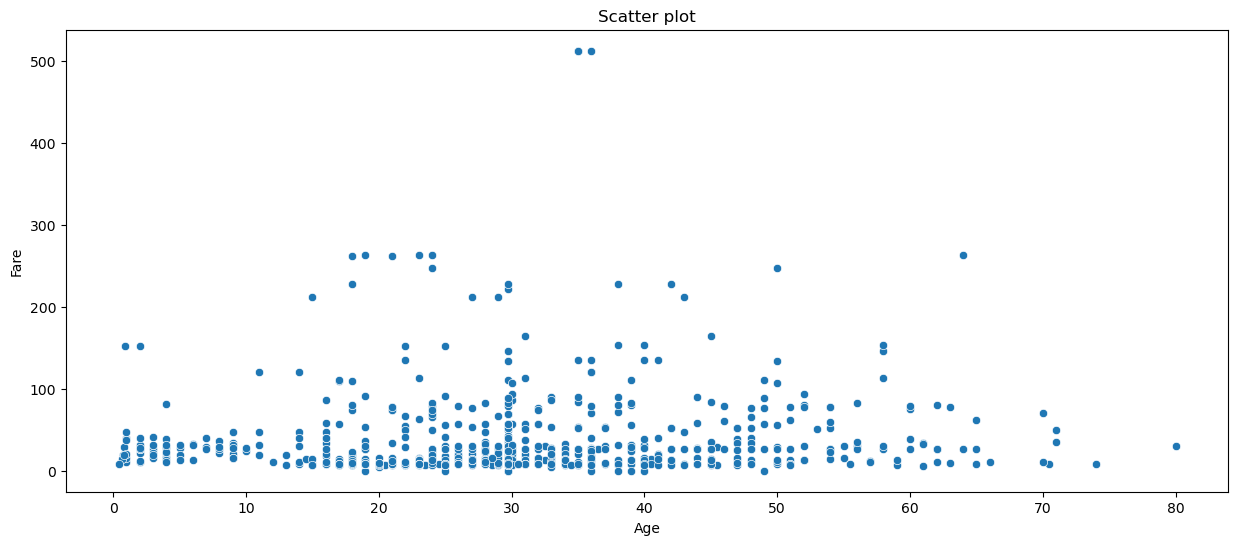

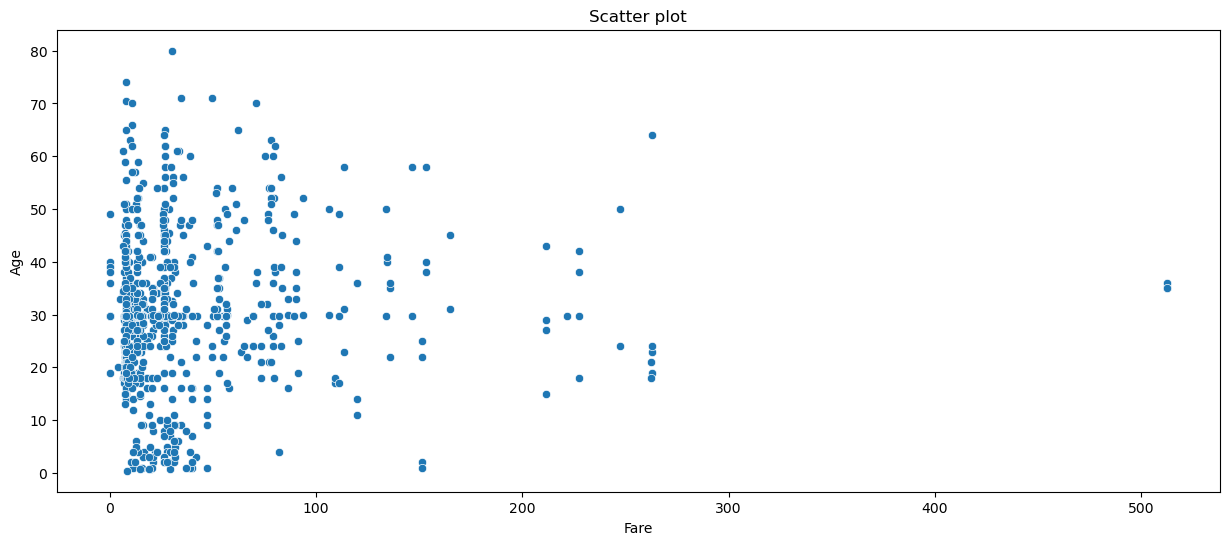

In [40]:
for i in continuous:
    for j in continuous:
        if i!=j:
            plt.figure(figsize=(15, 6))
            sns.scatterplot(x=i, y=j, data=df, palette='hls')
            plt.title(f'Scatter plot')
            plt.show()

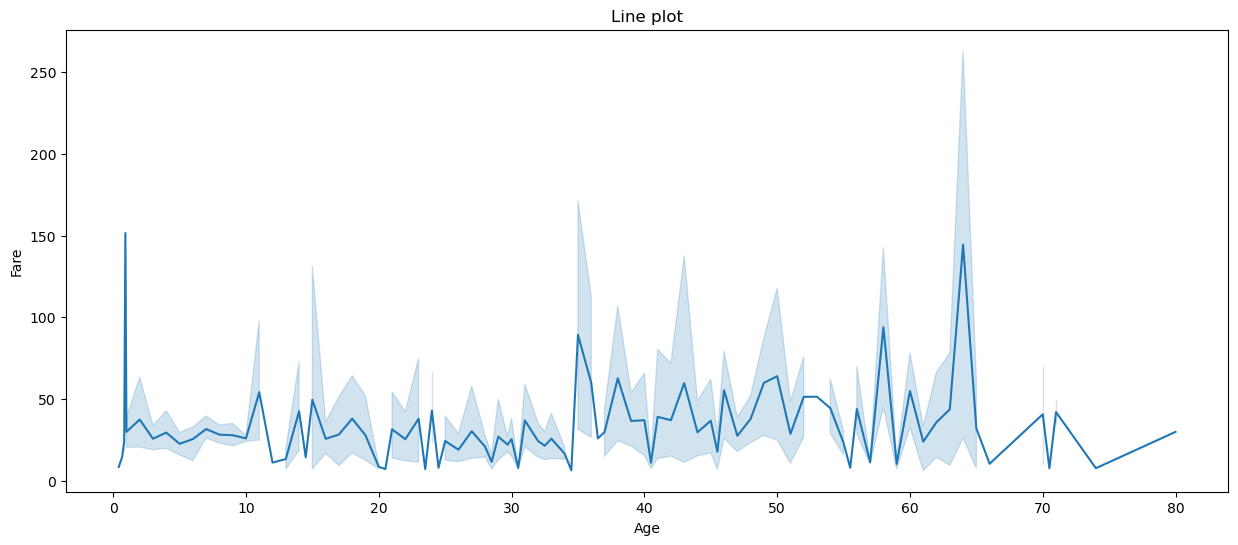

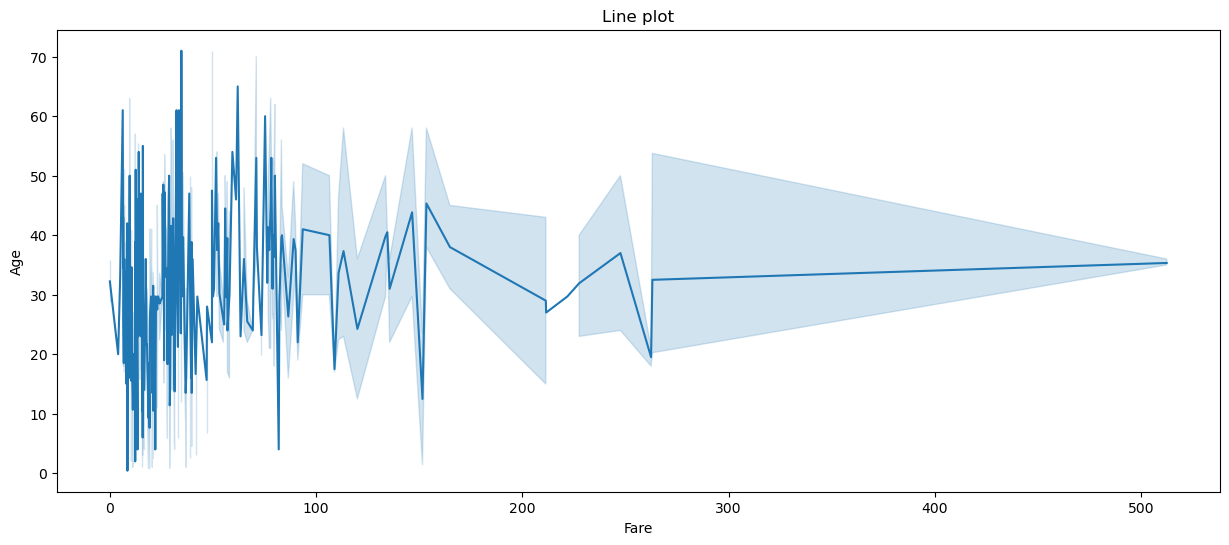

In [41]:
for i in continuous:
    for j in continuous:
        if i!=j:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=i, y=j, data=df, palette='hls')
            plt.title(f'Line plot')
            plt.show()

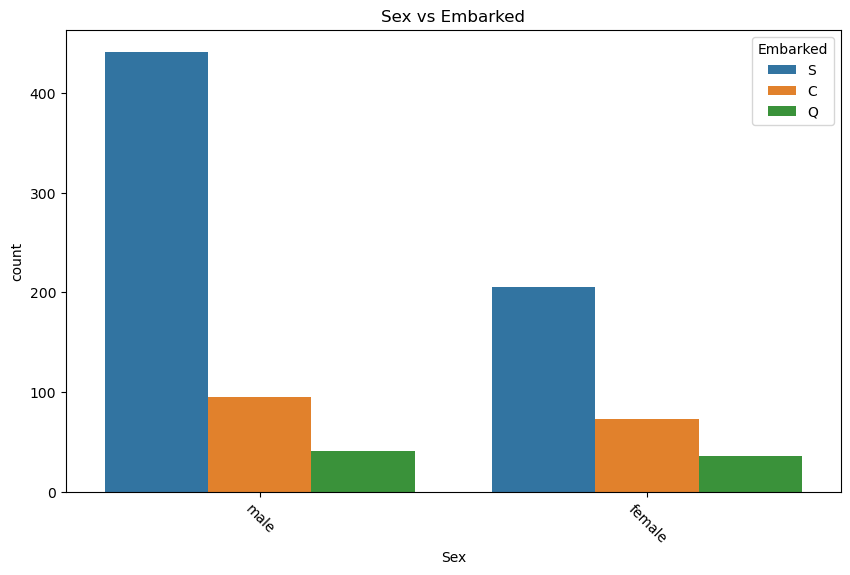

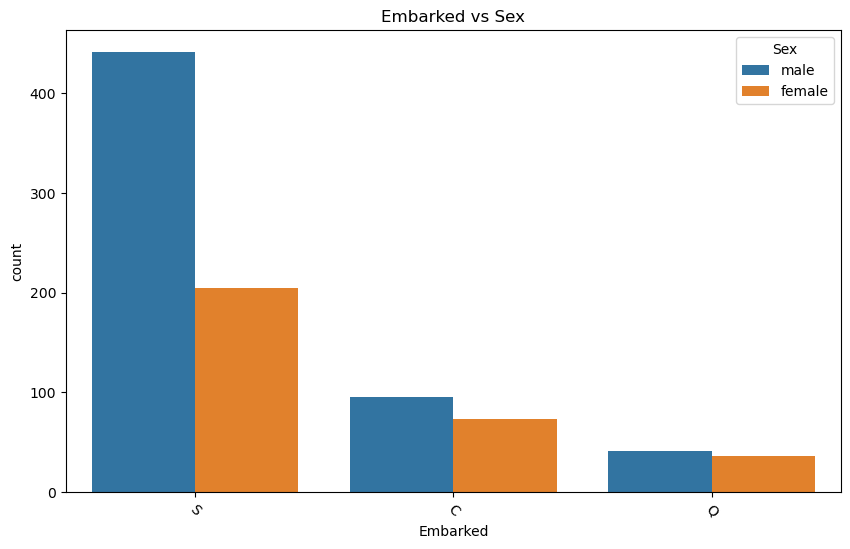

In [42]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

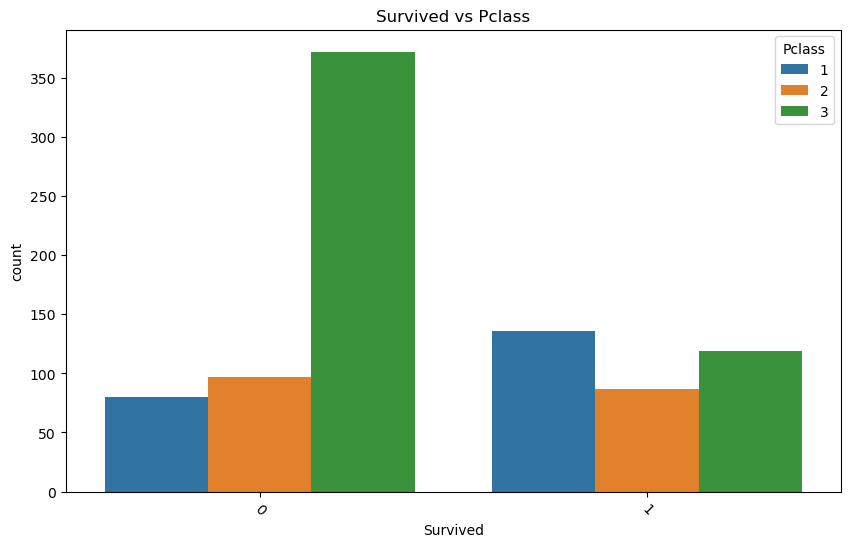

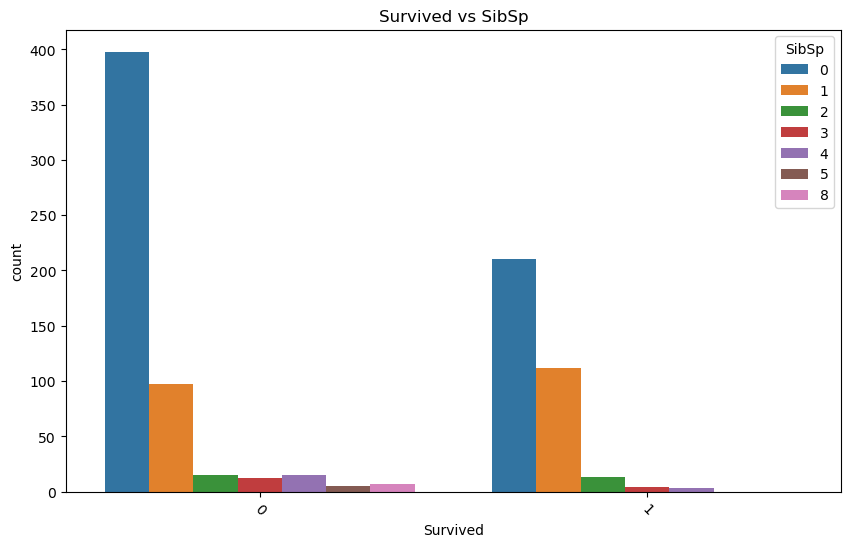

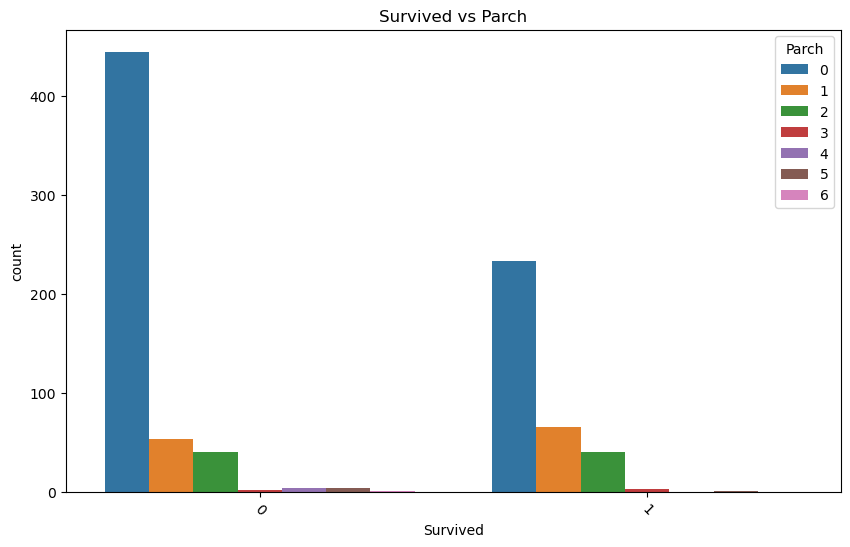

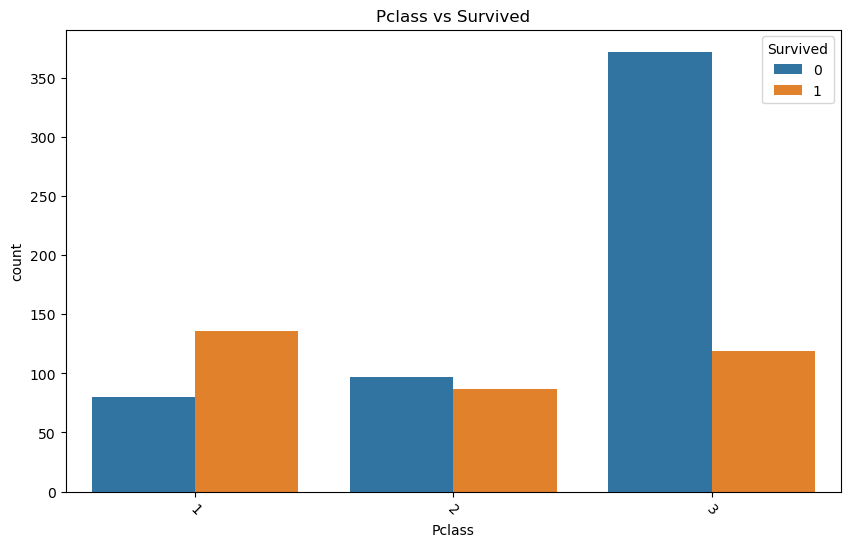

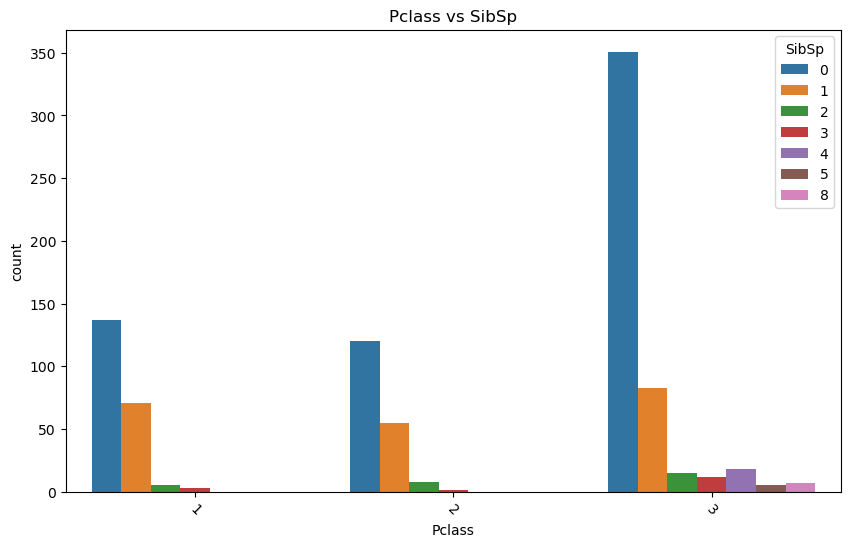

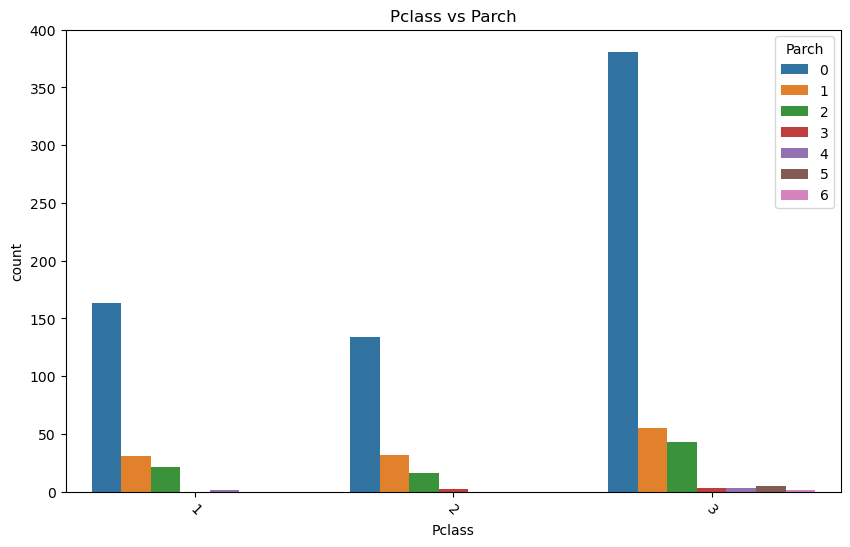

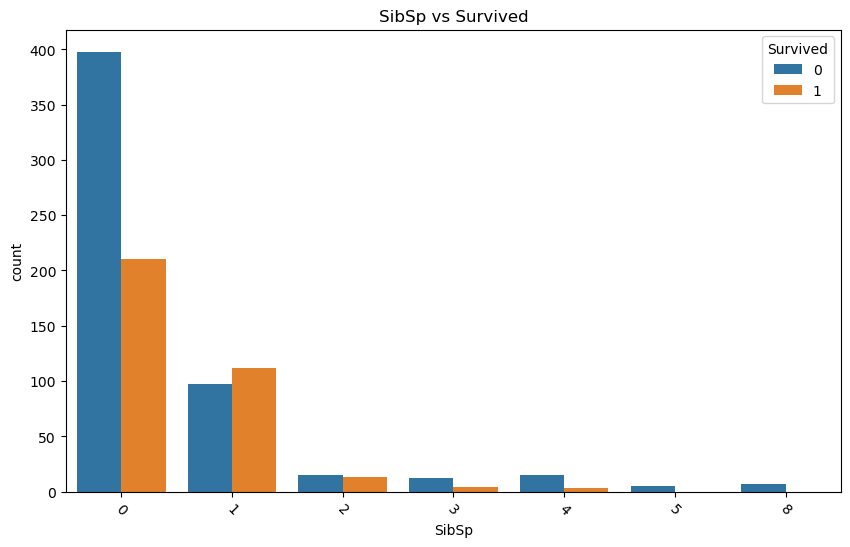

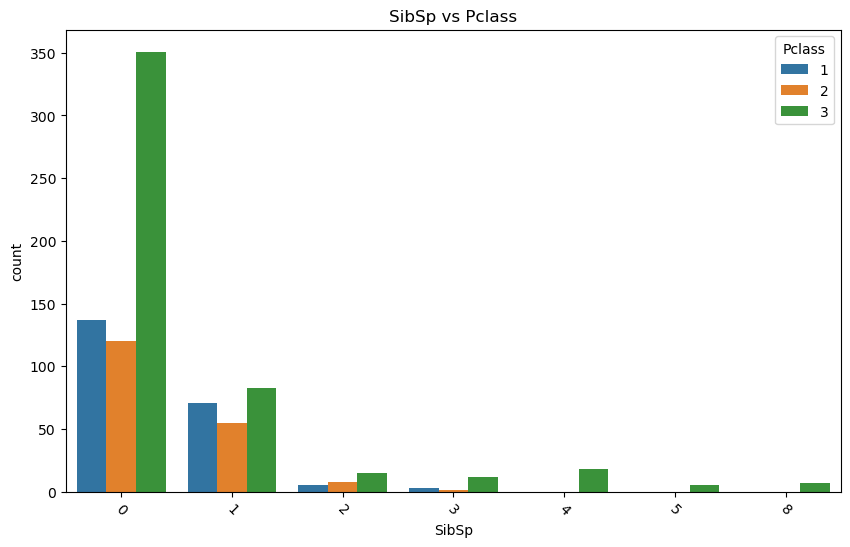

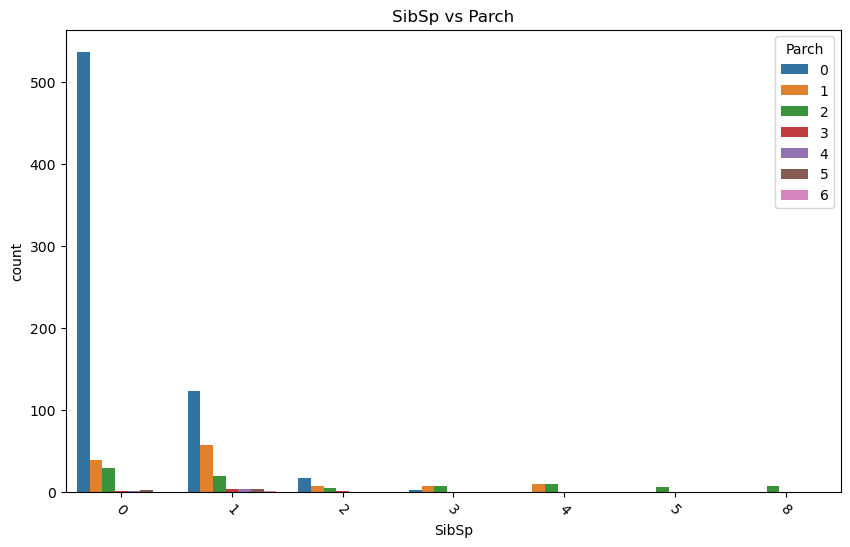

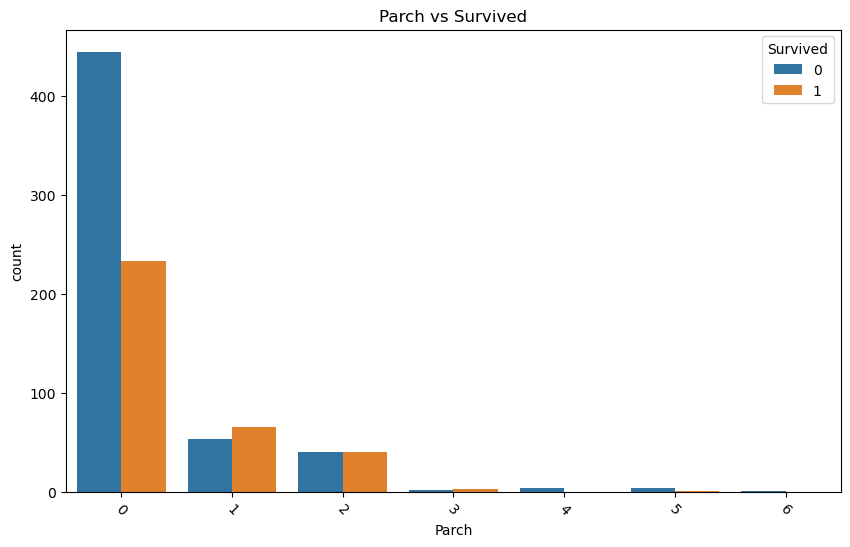

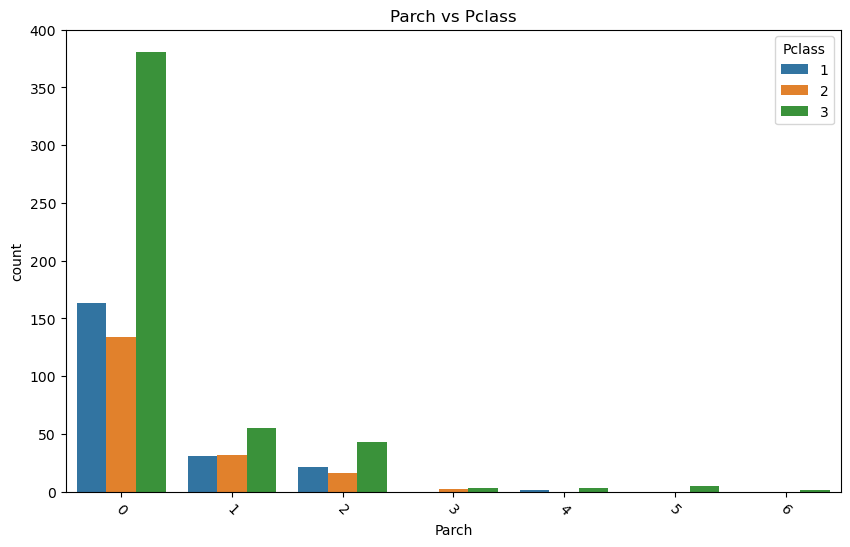

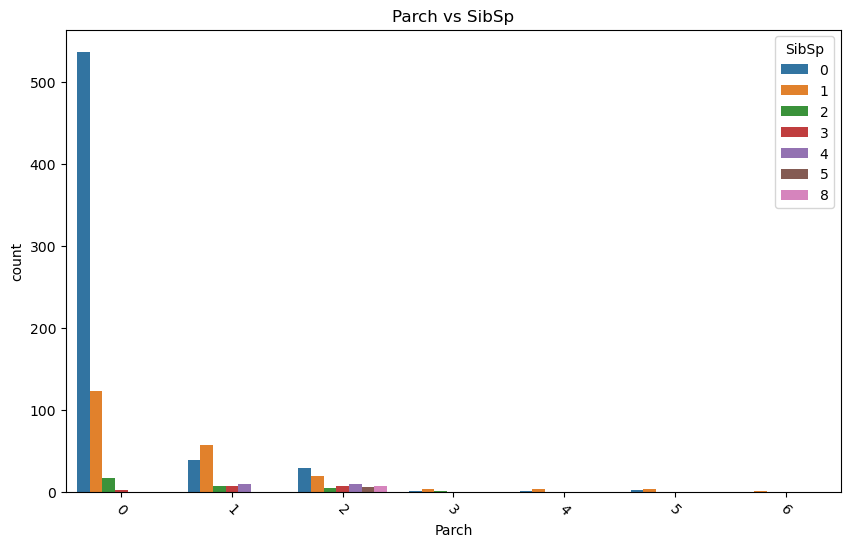

In [43]:
for cat1 in discrete:
    for cat2 in discrete:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

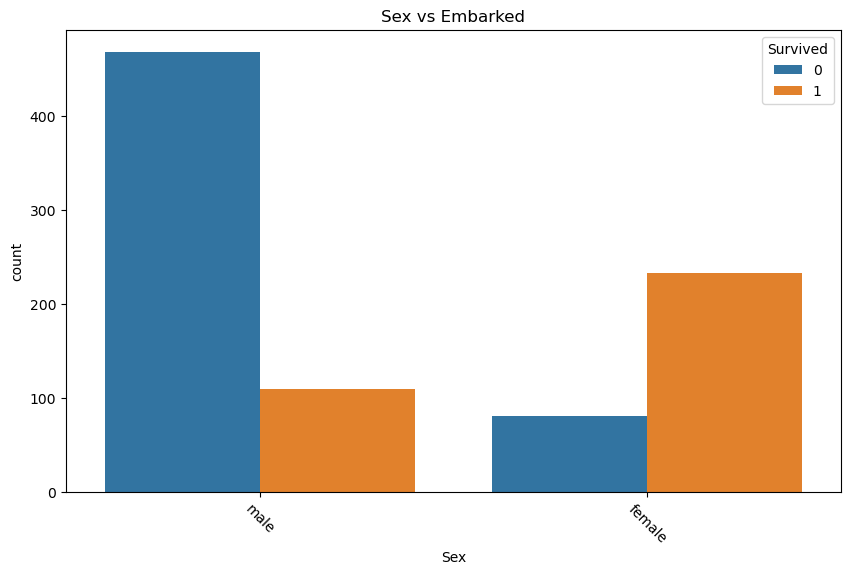

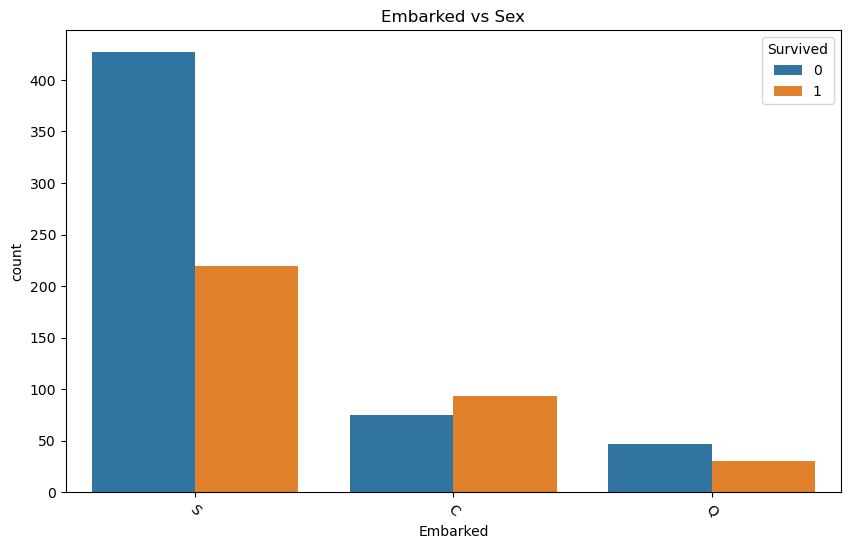

In [44]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue='Survived')
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

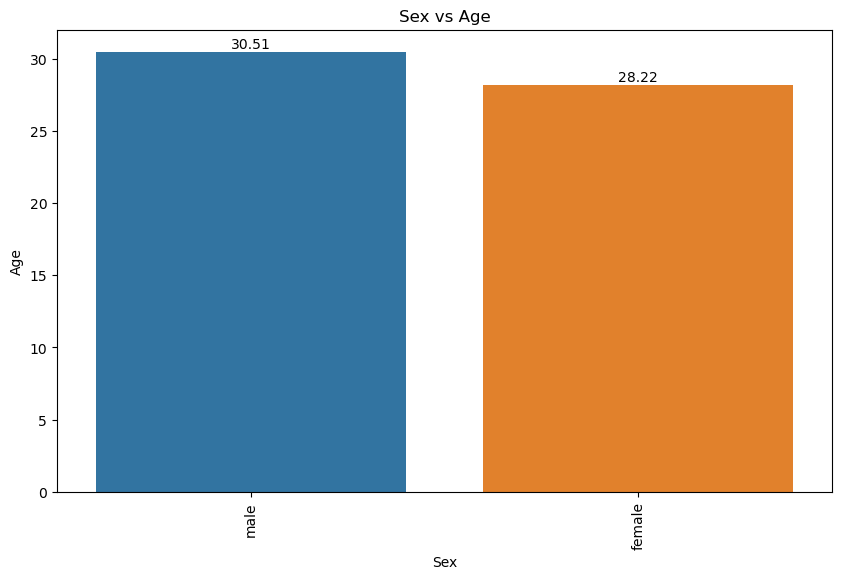

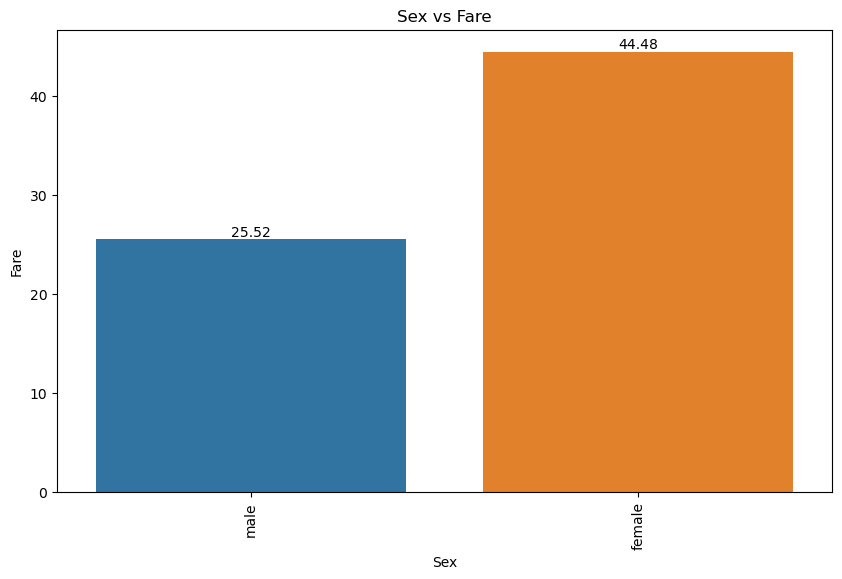

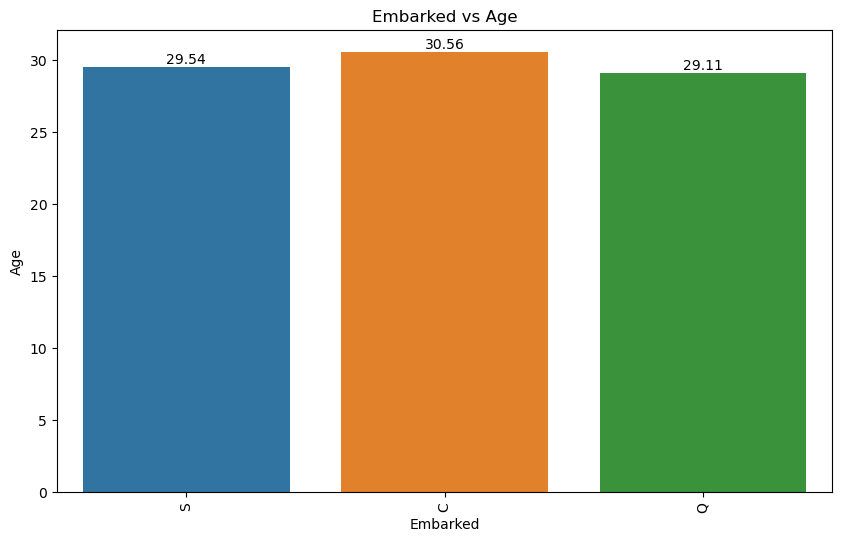

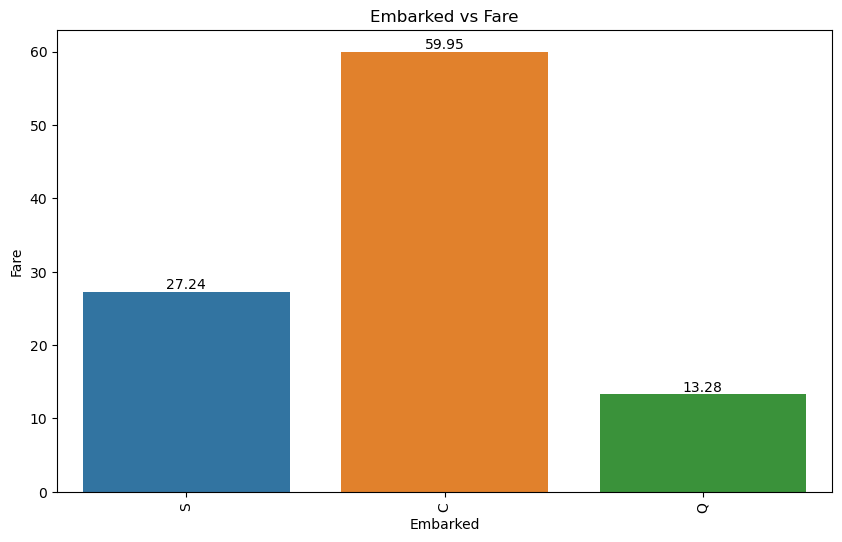

In [45]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

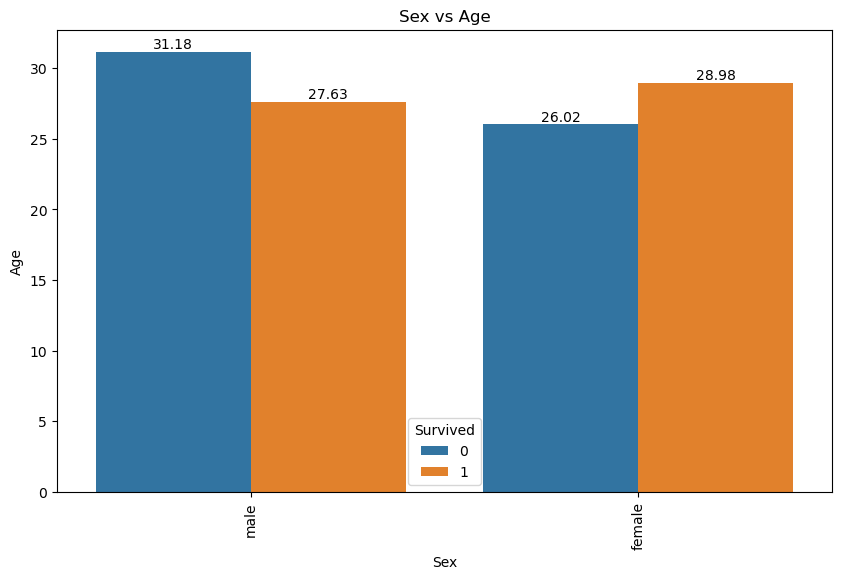

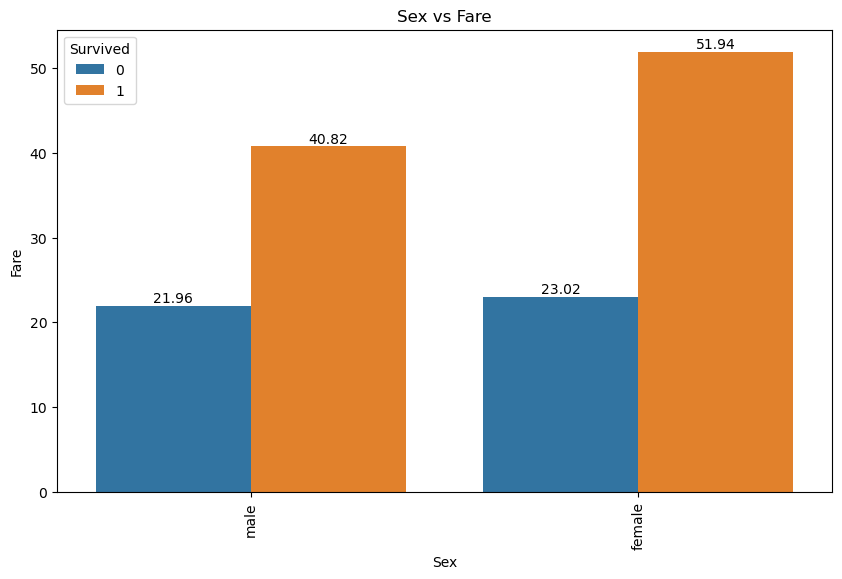

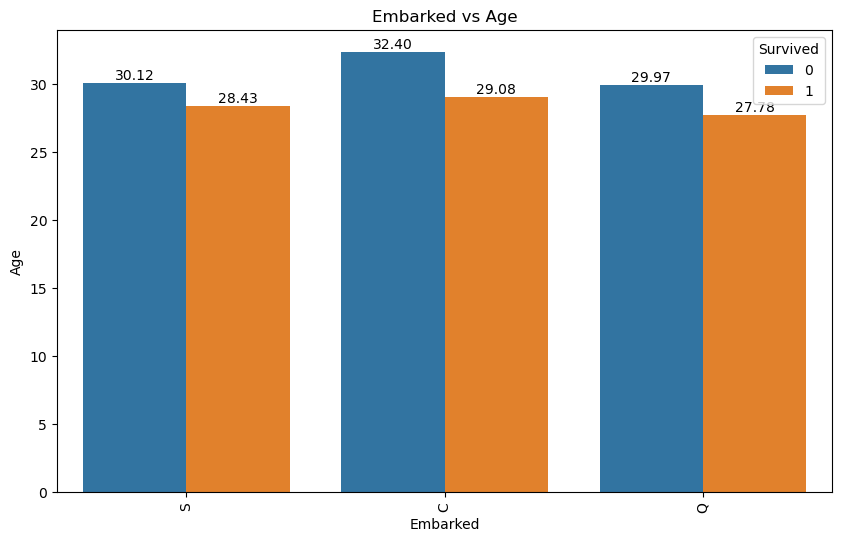

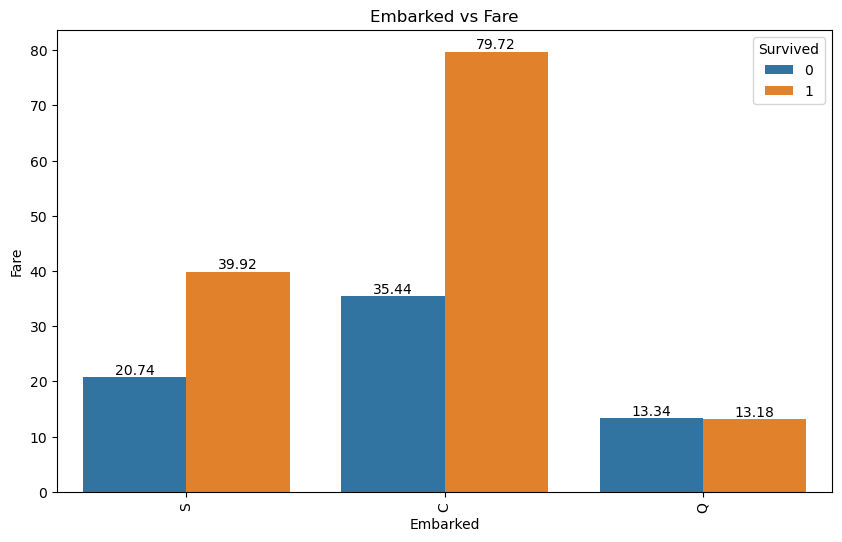

In [46]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, hue='Survived' ,ci=None)
        plt.title(f'{cat} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

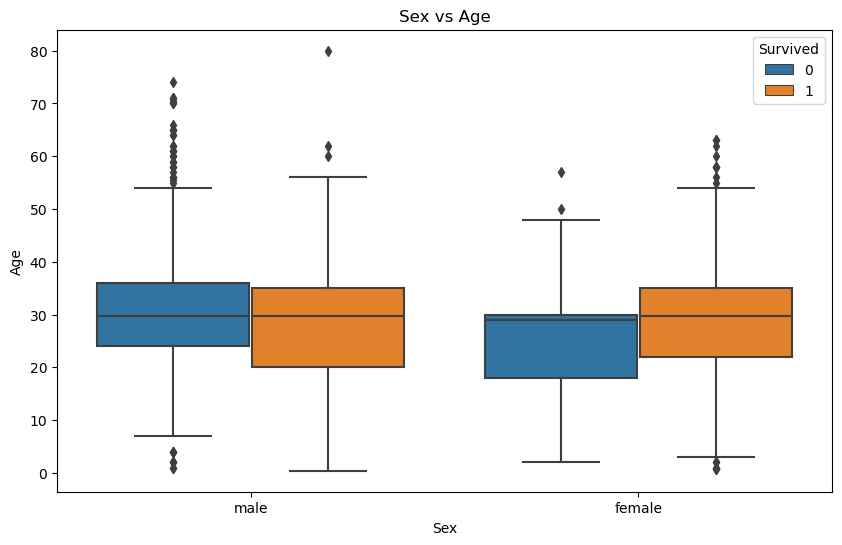

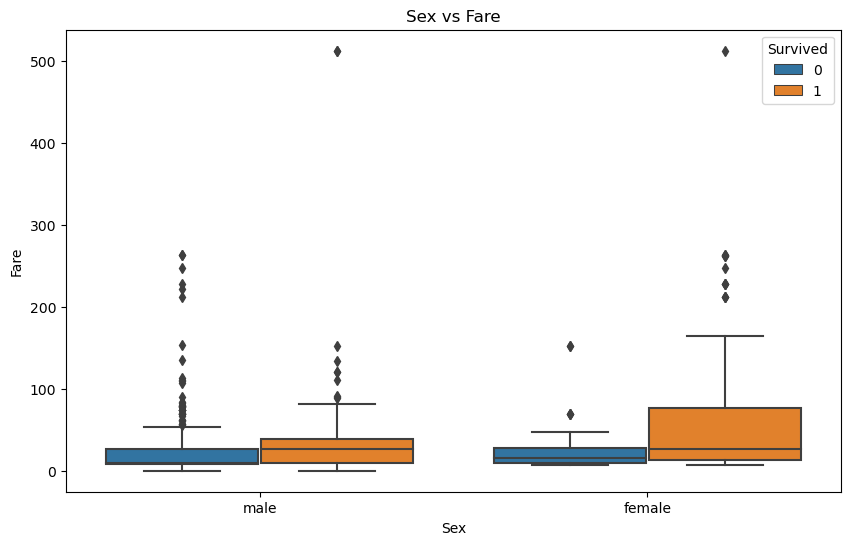

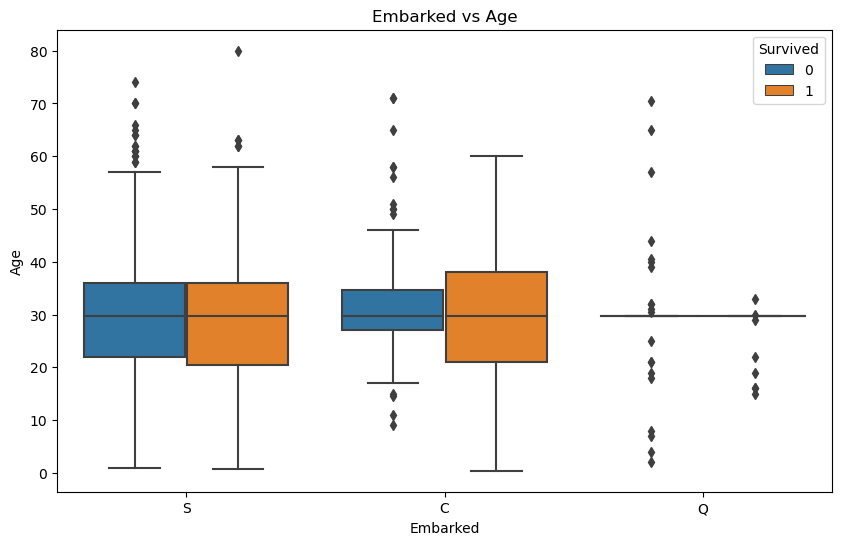

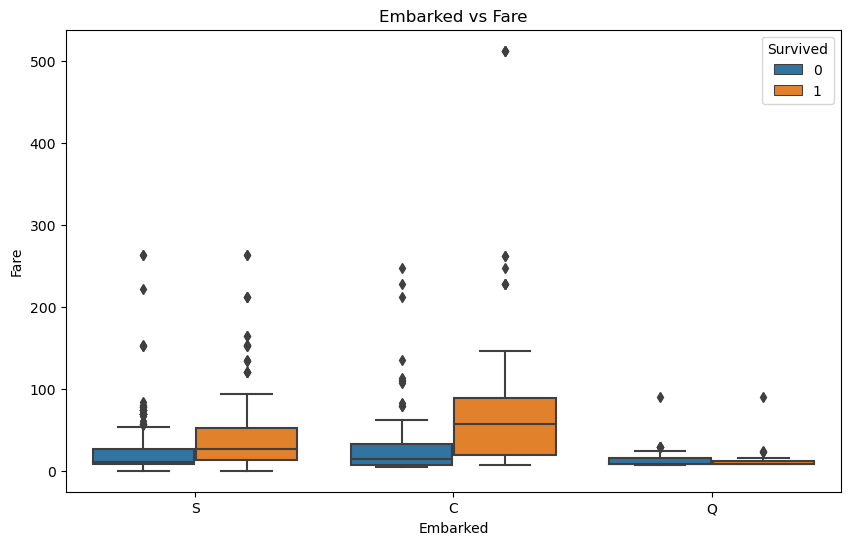

In [47]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(data=df, x=cat, y=cont, hue='Survived')
        plt.title(f'{cat} vs {cont}')
        
        '''for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()'''

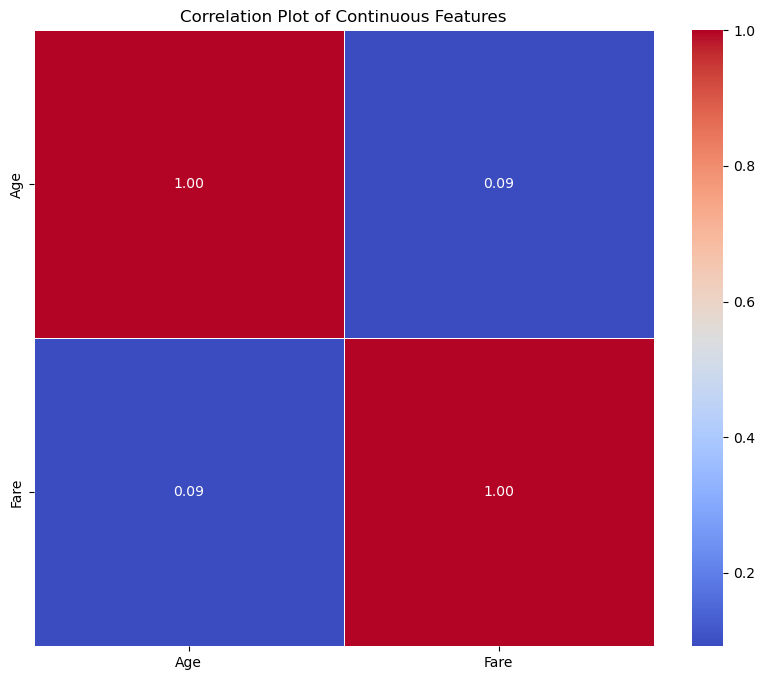

In [48]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [49]:
avg_age_by_gender = df.groupby('Sex')['Age'].mean().sort_values(ascending=False)

In [50]:
avg_age_by_gender

Sex
male      30.505824
female    28.216730
Name: Age, dtype: float64

In [51]:
avg_age_by_gender = df.groupby('Sex')[['Age','Fare']].mean().sort_values(ascending=False, by='Fare')

In [52]:
avg_age_by_gender

Age       Fare
Sex                         
female  28.216730  44.479818
male    30.505824  25.523893

In [53]:
avg_age_by_gender = df.groupby(['Sex','Survived'])[['Age','Fare']].mean().sort_values(ascending=False, by='Fare')

In [54]:
avg_age_by_gender

Age       Fare
Sex    Survived                      
female 1         28.979263  51.938573
male   1         27.631705  40.821484
female 0         26.023272  23.024385
male   0         31.175224  21.960993

In [55]:
df

Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.000000      1      0   7.2500        S
1           1       1  female  38.000000      1      0  71.2833        C
2           1       3  female  26.000000      0      0   7.9250        S
3           1       1  female  35.000000      1      0  53.1000        S
4           0       3    male  35.000000      0      0   8.0500        S
..        ...     ...     ...        ...    ...    ...      ...      ...
886         0       2    male  27.000000      0      0  13.0000        S
887         1       1  female  19.000000      0      0  30.0000        S
888         0       3  female  29.699118      1      2  23.4500        S
889         1       1    male  26.000000      0      0  30.0000        C
890         0       3    male  32.000000      0      0   7.7500        Q

[891 rows x 8 columns]

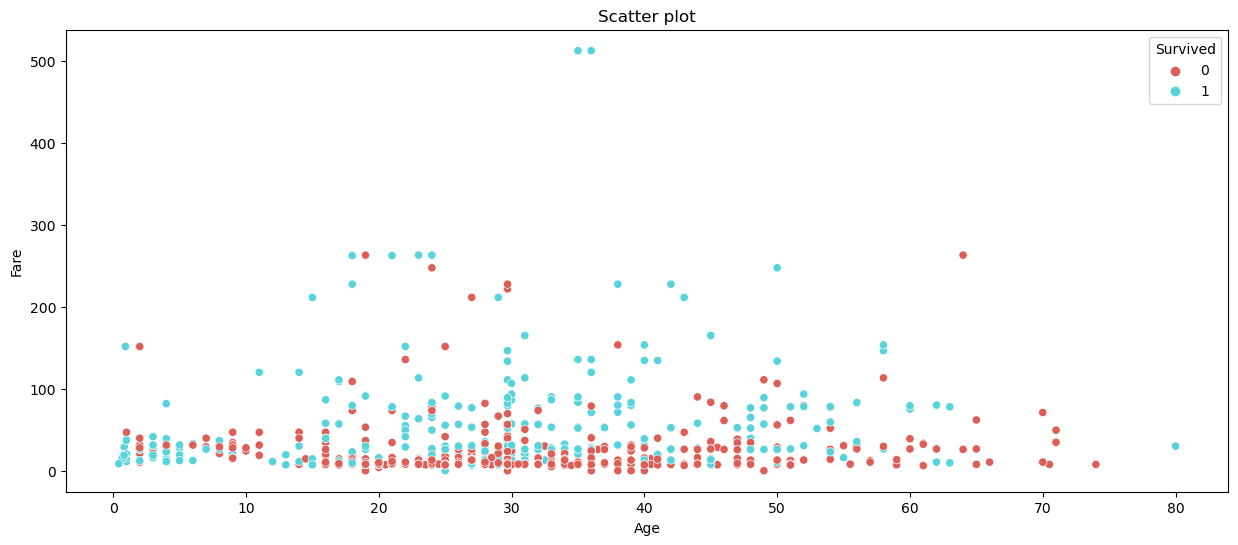

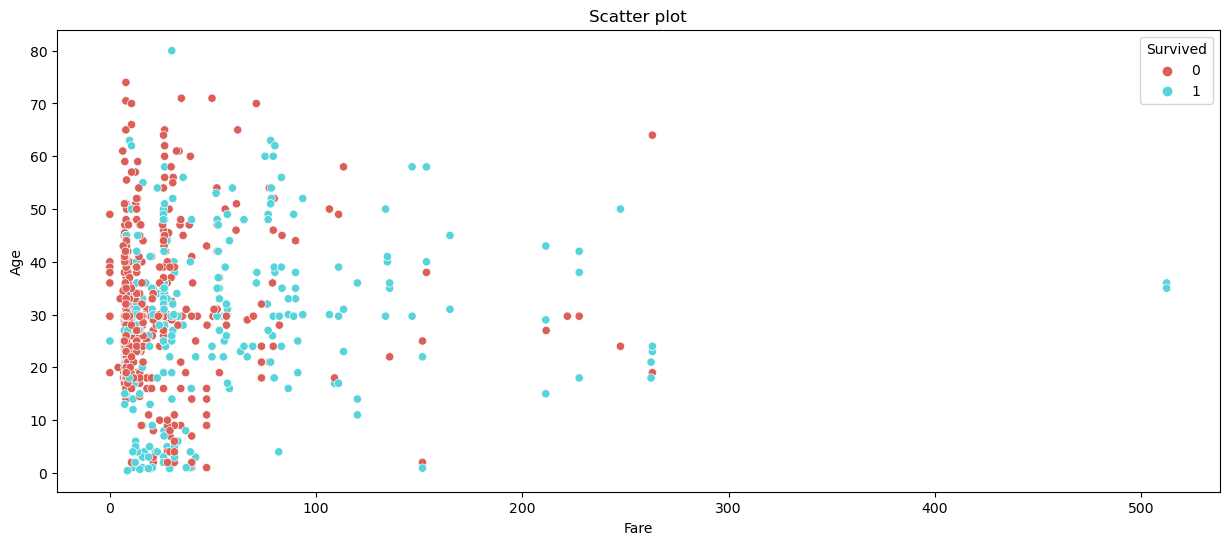

In [56]:
for i in continuous:
    for j in continuous:
        if i!=j:
            plt.figure(figsize=(15, 6))
            sns.scatterplot(x=i, y=j, data=df, palette='hls', hue='Survived')
            plt.title(f'Scatter plot')
            plt.show()

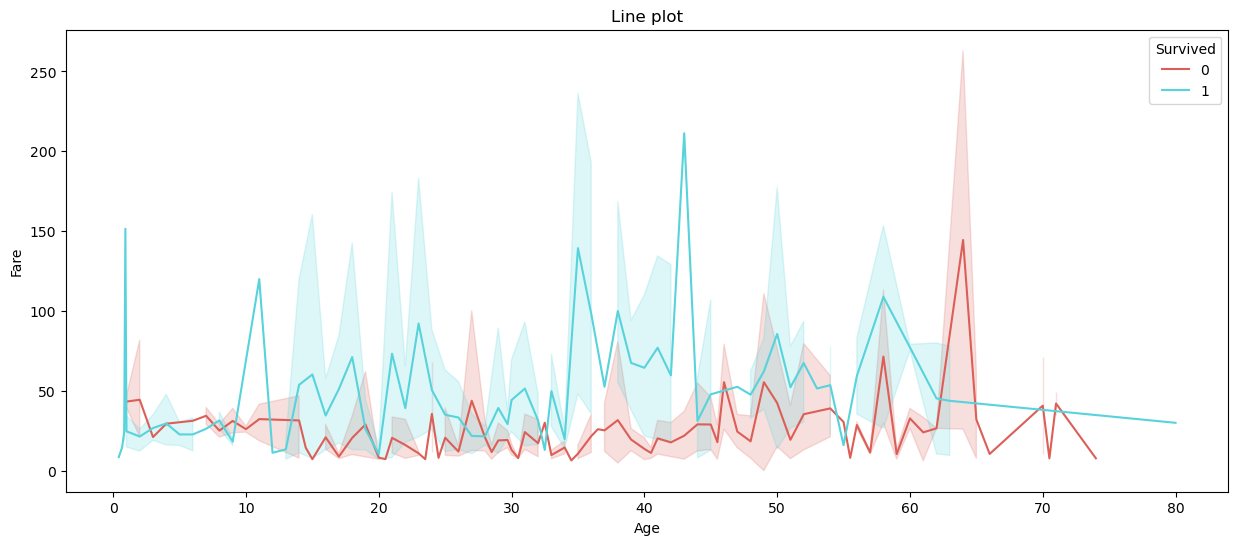

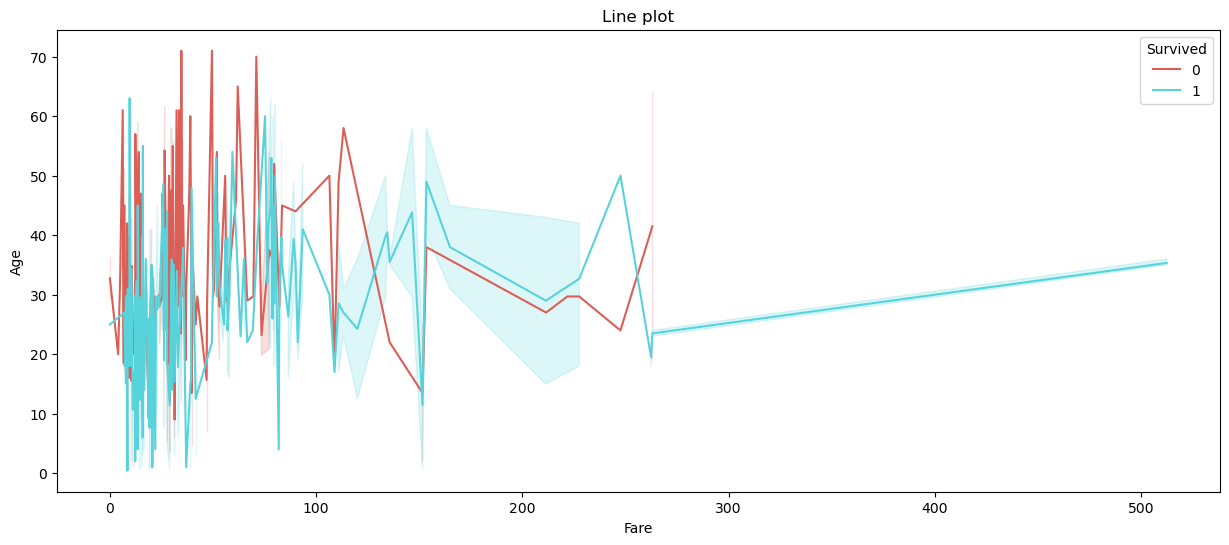

In [57]:
for i in continuous:
    for j in continuous:
        if i!=j:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=i, y=j, data=df, palette='hls',hue='Survived')
            plt.title(f'Line plot')
            plt.show()

In [58]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [59]:
df

Survived  Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.000000      1      0   7.2500           0         1   
1           1       1  38.000000      1      0  71.2833           1         0   
2           1       3  26.000000      0      0   7.9250           1         0   
3           1       1  35.000000      1      0  53.1000           1         0   
4           0       3  35.000000      0      0   8.0500           0         1   
..        ...     ...        ...    ...    ...      ...         ...       ...   
886         0       2  27.000000      0      0  13.0000           0         1   
887         1       1  19.000000      0      0  30.0000           1         0   
888         0       3  29.699118      1      2  23.4500           1         0   
889         1       1  26.000000      0      0  30.0000           0         1   
890         0       3  32.000000      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2             0           0           1  
3             0           0           1  
4             0           0           1  
..          ...         ...         ...  
886           0           0           1  
887           0           0           1  
888           0           0           1  
889           1           0           0  
890           0           1           0  

[891 rows x 11 columns]

In [60]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, 
                                                    random_state=42)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
sm = SMOTE()

In [66]:
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

In [67]:
y_train_res

0      1
1      0
2      0
3      1
4      1
      ..
873    1
874    1
875    1
876    1
877    1
Name: Survived, Length: 878, dtype: int64

In [68]:
X_train_res.shape

(878, 10)

In [69]:
y_train_res.value_counts()

1    439
0    439
Name: Survived, dtype: int64

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [71]:
y_pred = logreg.predict(X_test)

In [72]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

In [74]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# calculate precision
precision = precision_score(y_test, y_pred)

print(precision)

# calculate recall
recall = recall_score(y_test, y_pred)

print(recall)

# calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f1)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

y_prob = logreg.predict_proba(X_test)
print(y_prob)
cr = classification_report(y_test, y_pred)
print(cr)

0.8156424581005587
0.7647058823529411
0.7536231884057971
0.759124087591241
[[94 16]
 [17 52]]
[[0.91018412 0.08981588]
 [0.93892888 0.06107112]
 [0.75167764 0.24832236]
 [0.95452732 0.04547268]
 [0.25980524 0.74019476]
 [0.49965805 0.50034195]
 [0.19546405 0.80453595]
 [0.59128019 0.40871981]
 [0.56521456 0.43478544]
 [0.78932587 0.21067413]
 [0.77622825 0.22377175]
 [0.87889586 0.12110414]
 [0.34340698 0.65659302]
 [0.66900559 0.33099441]
 [0.52876839 0.47123161]
 [0.73977221 0.26022779]
 [0.59419694 0.40580306]
 [0.8832778  0.1167222 ]
 [0.81558141 0.18441859]
 [0.18248463 0.81751537]
 [0.8832778  0.1167222 ]
 [0.18068438 0.81931562]
 [0.88458533 0.11541467]
 [0.51589569 0.48410431]
 [0.88020493 0.11979507]
 [0.02404464 0.97595536]
 [0.77622825 0.22377175]
 [0.67894727 0.32105273]
 [0.80274451 0.19725549]
 [0.80656236 0.19343764]
 [0.90078851 0.09921149]
 [0.046703   0.953297  ]
 [0.85937143 0.14062857]
 [0.86118002 0.13881998]
 [0.82106924 0.17893076]
 [0.78846353 0.21153647]
 [0.79

In [75]:
from scikitplot.metrics import plot_confusion_matrix, plot_roc

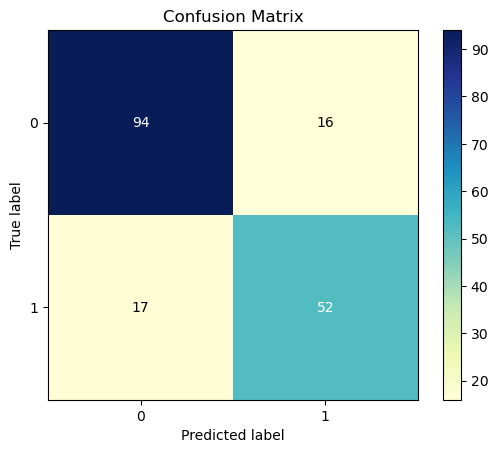

In [76]:
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()

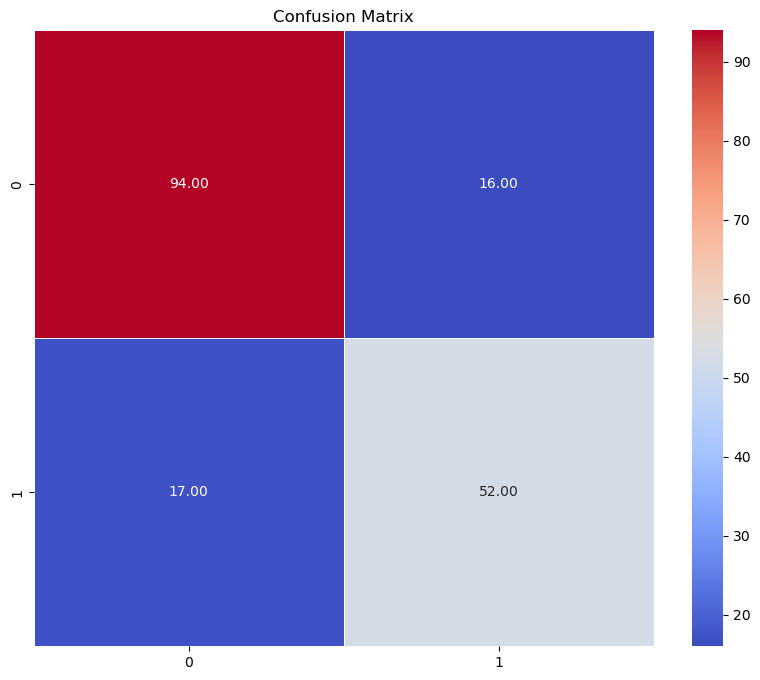

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Confusion Matrix')
plt.show()

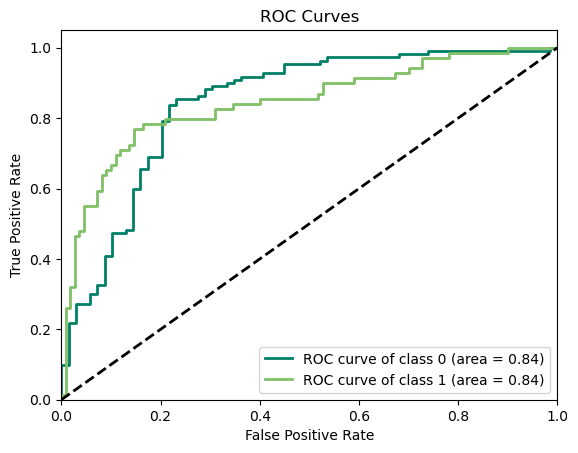

In [78]:
plot_roc(y_test, y_prob, plot_macro= False, plot_micro= False, cmap= 'summer')
plt.show()